In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.stem.porter import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


<AxesSubplot: xlabel='Rating', ylabel='count'>

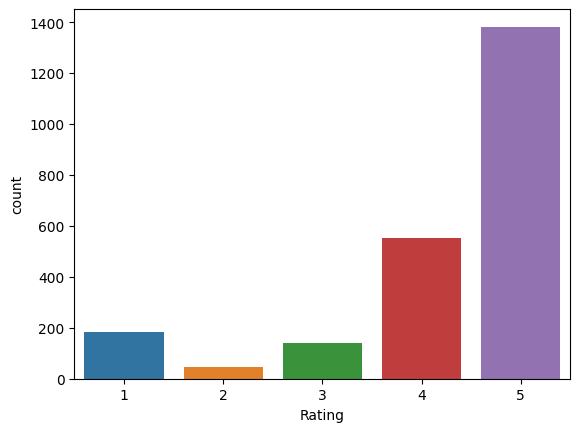

In [5]:
sns.countplot(x=data['Rating'])

In [7]:
data['Review']=data['Review'].str.lower()
data['Review']=data['Review'].str.replace('[^\w\s]','') # noktalama isaretlerini kaldir
data['Review']=data['Review'].str.replace('\d+','') #rakamlari kaldir
data['Review']=data['Review'].str.replace('\r','').replace('\n','')

In [9]:
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best under k great performancei got it for aro...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfomence,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,my wife is so happy and best product,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop with new amazing features ...,5


In [12]:
 def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
star5 = data[data['Rating']==5]['Review']

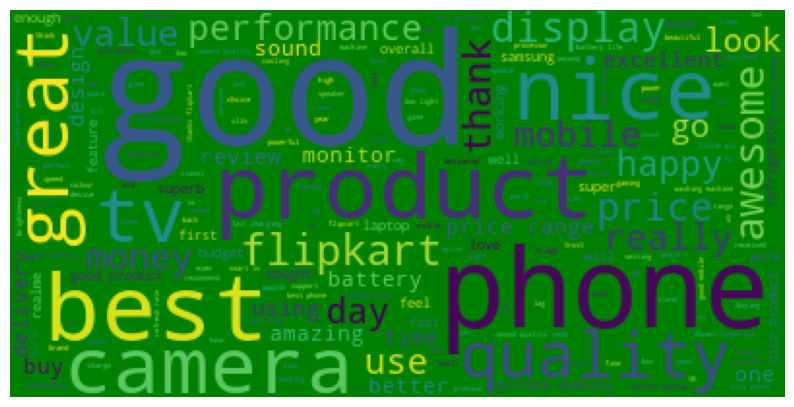

In [15]:
wc(star5,"green")

In [16]:
star1 = data[data['Rating']==1]['Review']

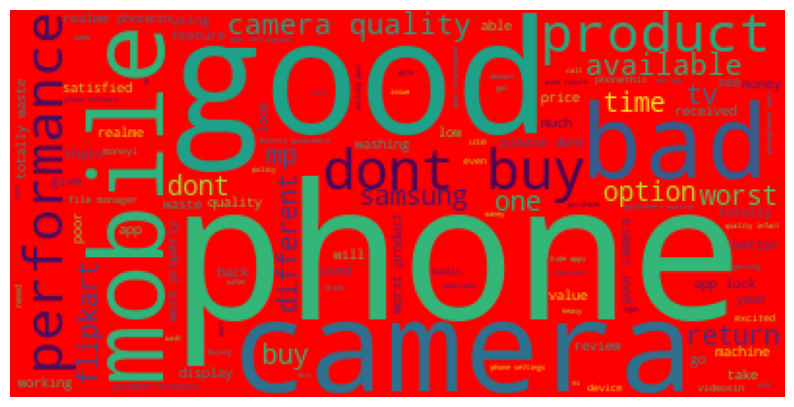

In [17]:
wc(star1,"red")

In [19]:
x=data['Review']
y=data['Rating']

In [21]:
vect=CountVectorizer(stop_words='english',lowercase=True)

In [22]:
x=vect.fit_transform(x)

In [23]:
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [24]:
model=s.fit(x_train,y_train)

In [25]:
predict = model.predict(x_test)

In [26]:
accuracy_score(predict,y_test)

0.7830802603036876

In [27]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...


                                              Review  Positive  Negative  \
0  best under k great performancei got it for aro...     0.319     0.074   
1                                    good perfomence     0.744     0.000   
2  great performance but usually it has also that...     0.119     0.000   
3              my wife is so happy and best product      0.605     0.000   
4  light weight laptop with new amazing features ...     0.467     0.000   

   Neutral  
0    0.608  
1    0.256  
2    0.881  
3    0.395  
4    0.533  


In [28]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [29]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  862.941
Negative:  109.02599999999997
Neutral:  1332.0430000000028
